In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Crime_data.csv")
print(df.head())
print(df.info())
print(df.describe())

     Region  Population_Density  Poverty_Level  Police_Presence  \
0  Region_A                1690             46               64   
1  Region_B                1881             51               50   
2  Region_C                1294             37               26   
3  Region_D                1790             68               70   
4  Region_E                1102             26               98   

  Crime_Rate_Category  
0                 Low  
1                High  
2                 Low  
3             Between  
4                High  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region               26 non-null     object
 1   Population_Density   26 non-null     int64 
 2   Poverty_Level        26 non-null     int64 
 3   Police_Presence      26 non-null     int64 
 4   Crime_Rate_Category  26 non-null     object
dtypes: 

In [18]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [30]:
features = ['Population_Density','Poverty_Level','Police_Presence']
target = 'Crime_Rate_Category'

In [32]:
X = df[features]
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state = 42)

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred = knn.predict(X_test)

In [50]:
conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix:",conf_matrix)
classification_rep = classification_report(y_test,y_pred)
print("Classification report:",classification_rep)

Confusion matrix: [[0 1 0]
 [2 0 0]
 [1 1 1]]
Classification report:               precision    recall  f1-score   support

     Between       0.00      0.00      0.00         1
        High       0.00      0.00      0.00         2
         Low       1.00      0.33      0.50         3

    accuracy                           0.17         6
   macro avg       0.33      0.11      0.17         6
weighted avg       0.50      0.17      0.25         6



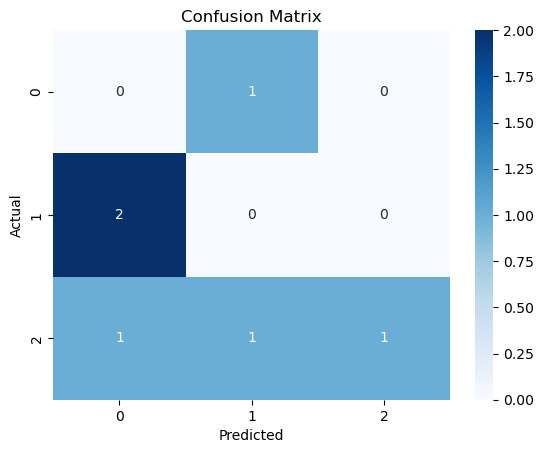

In [54]:
sns.heatmap(conf_matrix,annot = True,fmt='d',cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

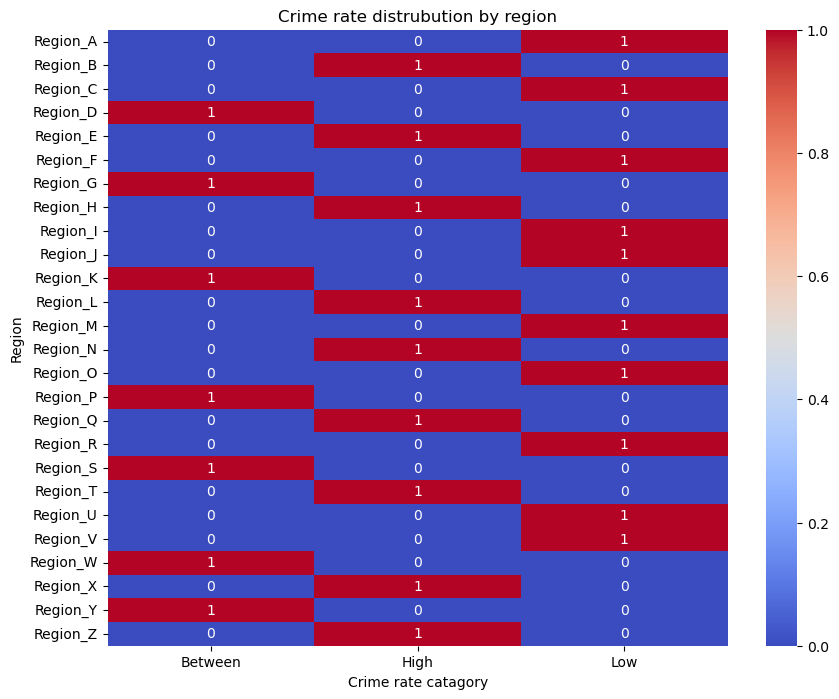

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(df.pivot_table(index='Region',columns = 'Crime_Rate_Category',aggfunc = 'size',fill_value=0),cmap='coolwarm',annot=True)
plt.title('Crime rate distrubution by region')
plt.xlabel('Crime rate catagory')
plt.ylabel('Region')
plt.show()